In [20]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [21]:
sample = ["2Mu2E_100GeV_5GeV_400mm"]

fileset = utilities.make_fileset(sample, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = [
    "looseBarrelE_matched",
    "barrelE_matched",
    "barrelE_ID-EtaInSeed_matched",
    "barrelE_ID-DPhiIn_matched",
    "barrelE_ID-Inverse_matched",
    "barrelE_ID-sigmaIetaIeta_matched",
    "barrelE_ID-Iso_matched",
    "barrelE_ID-ConversionVeto_matched",
    "barrelE_ID-MissingHits_matched",
    "barrelE_ID-HE_matched",
    # "looseEndcapE"
    # "endcapE",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra", "electron_extra_2d"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]
hists = out["2Mu2E_100GeV_5GeV_400mm"]["hists"]

Output()

Not applying any cuts to the lepton jets for channel  looseBarrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-EtaInSeed_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-Inverse_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaIetaIeta_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-Iso_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-ConversionVeto_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-MissingHits_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-HE_matched
Not applying any cuts to the lepton jets for channel  looseBarrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_matched
Not applying any cuts to the lepton jets for channel 

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

In [ ]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δηseed Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :40j:1j, :].profile(axis="electron_GsfEleDEtaInSeedCut"))
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:18]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δηseed Barrel, all electrons")

plt.figure(figsize=(30,10))
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["electron_GenA_Lxy"][channels[0], :20j:1j ].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"][ "electron_GenA_Lxy"][channels[2], :20j:1j ], 
       rp_num_label="loose barrel electrons",
       rp_denom_label="n-1 electrons",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

Text(0, 1, 'Δφin Barrel, all electrons')

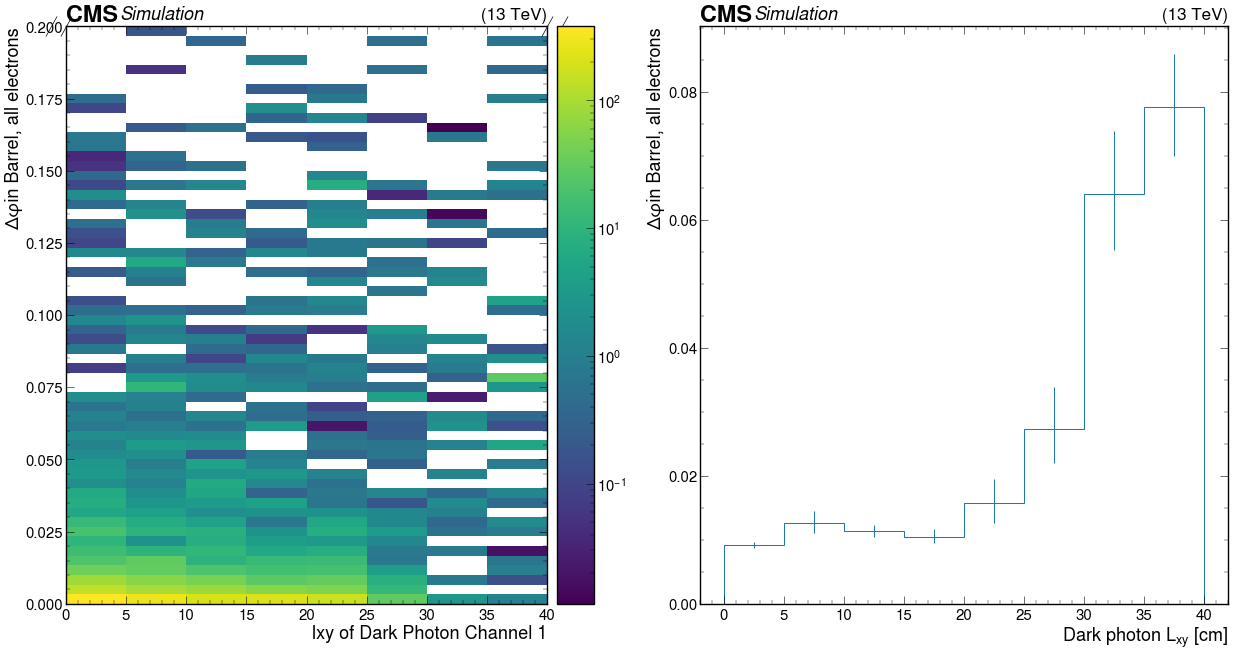

In [5]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δφin Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :40j:5j, :].profile(axis="electron_GsfEleDPhiInCut"))
#print(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:26]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δφin Barrel, all electrons")

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.

Text(0, 1, '|1/E - 1/p| Barrel, all electrons')

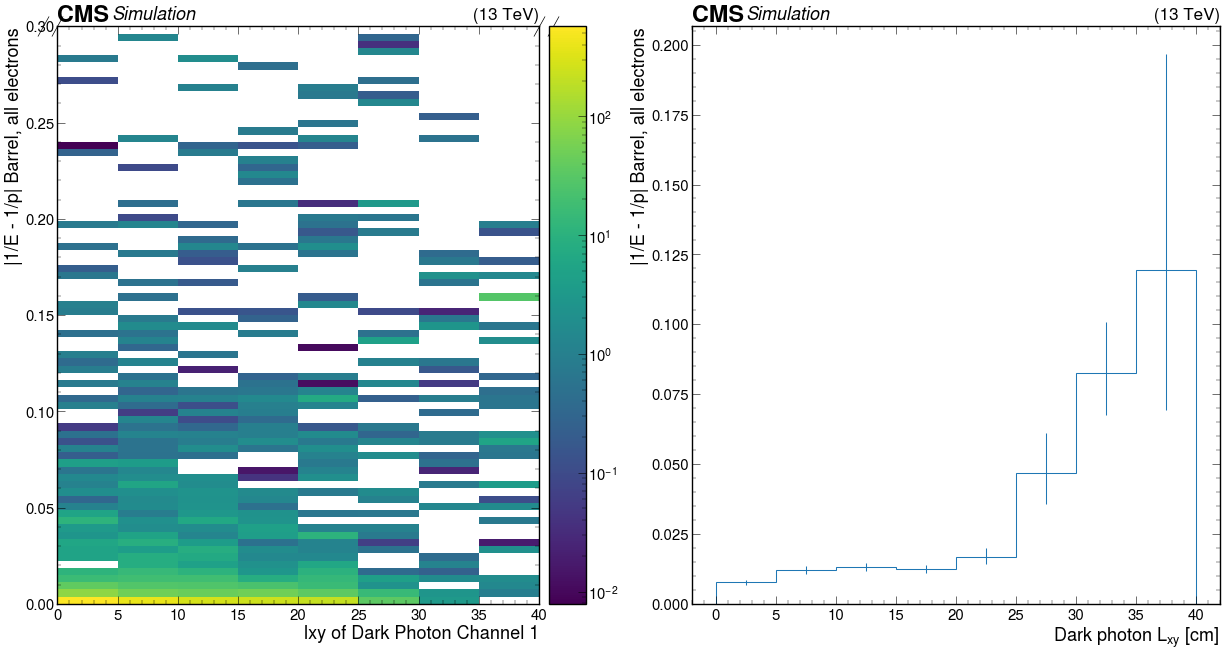

In [6]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("|1/E - 1/p| Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :40j:5j, :].profile(axis="electron_GsfEleEInverseMinusPInverseCut"))  
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 2, sum),:51]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("|1/E - 1/p| Barrel, all electrons")

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

                         ┌───────────────────────────────────────────────────┐
[   -inf,       0) 0     │                                                   │
[      0, 0.00075) 0     │                                                   │
[0.00075,  0.0015) 0     │                                                   │
[ 0.0015, 0.00225) 0     │                                                   │
[0.00225,   0.003) 0     │                                                   │
[  0.003, 0.00375) 0     │                                                   │
[0.00375,  0.0045) 0     │                                                   │
[ 0.0045, 0.00525) 1.045 │▌                                                  │
[0.00525,   0.006) 3.675 │█▊                                                 │
[  0.006, 0.00675) 4.732 │██▎                                                │
[0.00675,  0.0075) 18.29 │████████▉                                          │
[ 0.0075, 0.00825) 48.05 │███████████████████████▍  

Text(0, 1, 'σiηiη Barrel, loose electrons')

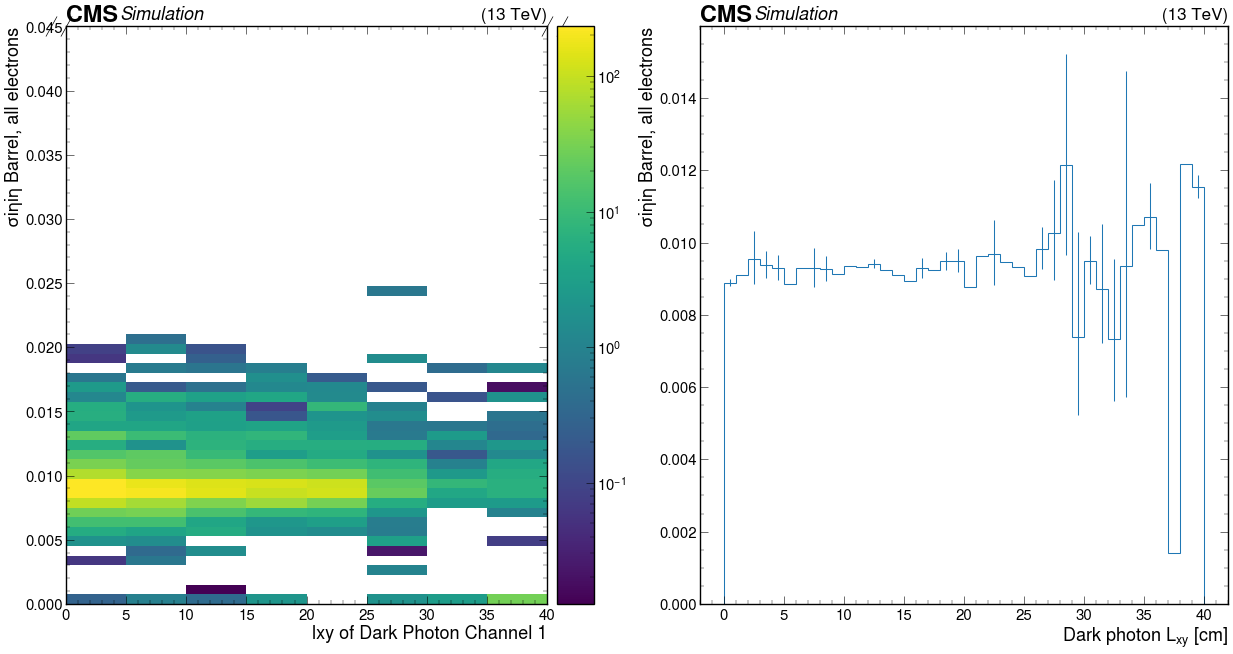

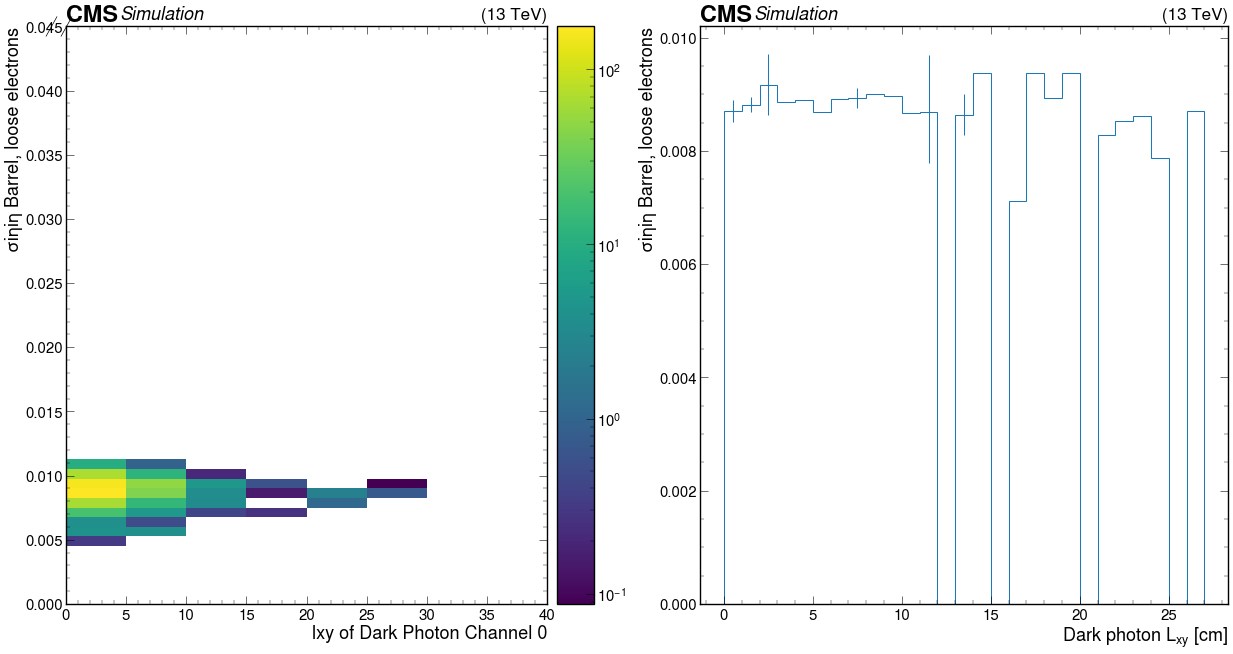

In [11]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("σiηiη Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :40j:1j, :].profile(axis="electron_GsfEleFull5x5SigmaIEtaIEtaCut"))
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 2, sum),:15]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("σiηiη Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("σiηiη Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :40j:1j, :].profile(axis="electron_GsfEleFull5x5SigmaIEtaIEtaCut"))
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:35]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("σiηiη Barrel, loose electrons")

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

                   ┌─────────────────────────────────────────────────────────┐
[-inf,   0) 0      │                                                         │
[   0,   1) 0.3139 │                                                         │
[   1, inf) 315.2  │████████████████████████████████████████████████████████ │
                   └─────────────────────────────────────────────────────────┘


/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'Conversion Veto Barrel, all electrons')

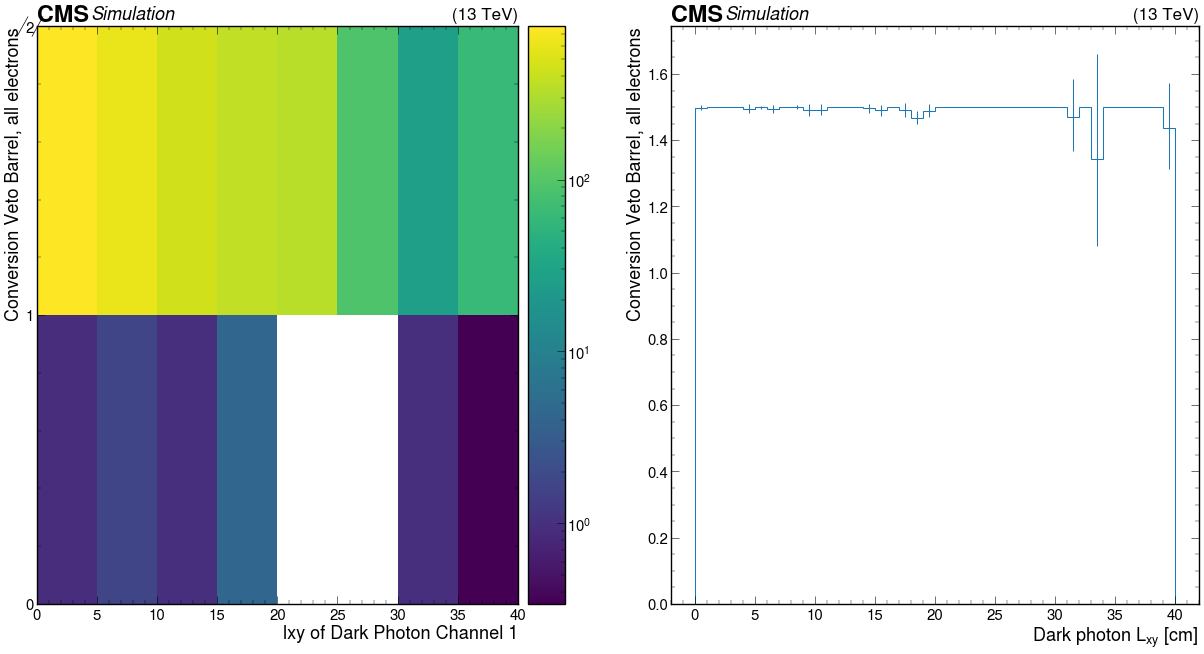

In [13]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Conversion Veto Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :40j:1j, :].profile(axis="electron_GsfEleConversionVetoCut"))  
print(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 2, sum),:1]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Conversion Veto Barrel, all electrons")

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

# Expected missing inner hits:

number of missing hits expected for GSF track.

Text(0, 1, 'Expected Missing Hits Barrel, all electrons')

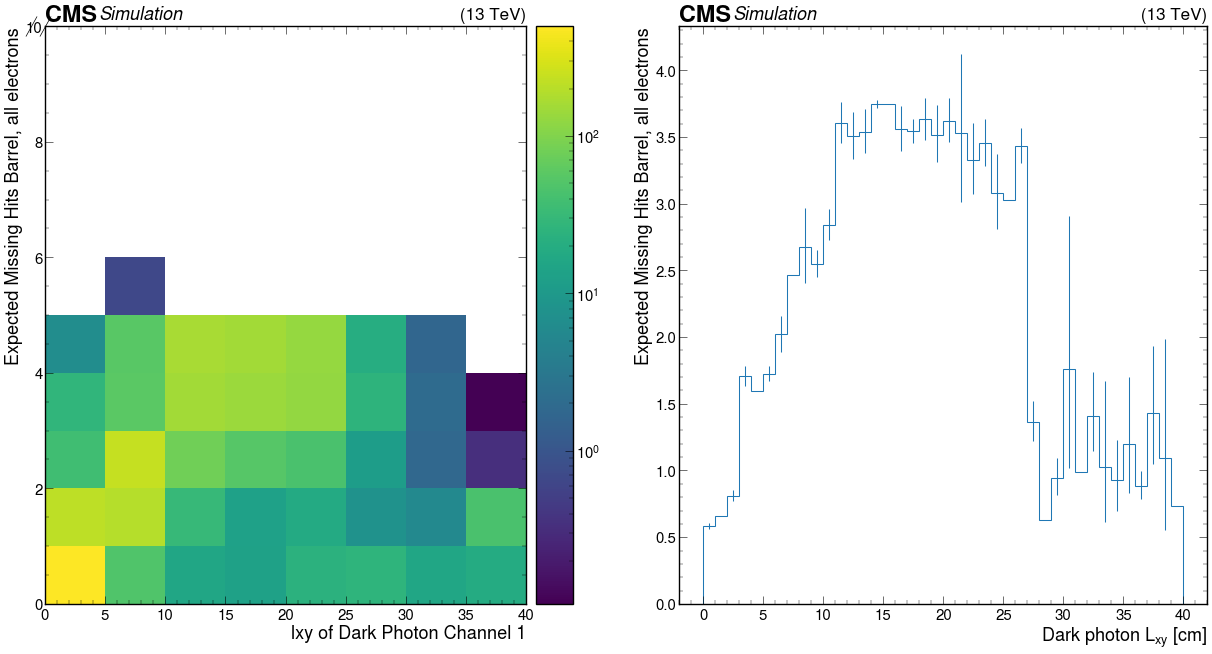

In [15]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Expected Missing Hits Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :40j:1j, :].profile(axis="electron_GsfEleMissingHitsCut"))
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum), 2:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Expected Missing Hits Barrel, all electrons")